# 데이터 분석 단계 초기화

In [1]:
root_path = '/content/drive/MyDrive/프로그래머스 데브코스 데이터 분석/최종 프로젝트/airbnb-recruiting-new-user-bookings'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# df_bkts = pd.read_csv(root_path+'/age_gender_bkts.csv')
# df_countries = pd.read_csv(root_path+'/countries.csv')
# df_submission = pd.read_csv(root_path+'/sample_submission_NDF.csv')
df_sessions = pd.read_csv(root_path+'/sessions.csv')
# df_test = pd.read_csv(root_path+'/test_users.csv')
df_train = pd.read_csv(root_path+'/train_users_2.csv')

# 사용자 데이터 분석

In [ ]:
df_train.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# 사용자 행동 데이터 분석

In [ ]:
df_temp_1 = df_train[['date_account_created','timestamp_first_active','date_first_booking']]
df_temp_1

,date_account_created,timestamp_first_active,date_first_booking
0,2010-06-28,20090319043255,NaN
1,2011-05-25,20090523174809,NaN
2,2010-09-28,20090609231247,2010-08-02
3,2011-12-05,20091031060129,2012-09-08
4,2010-09-14,20091208061105,2010-02-18
...,...,...,...
213446,2014-06-30,20140630235636,NaN
213447,2014-06-30,20140630235719,NaN
213448,2014-06-30,20140630235754,NaN
213449,2014-06-30,20140630235822,NaN


In [ ]:
df_temp_1['timestamp_first_active_new'] = df_temp_1['timestamp_first_active'].astype(str).str[0:4] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[4:6] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[6:8]
df_temp_1.drop('timestamp_first_active',inplace=True,axis=1)

<ipython-input-5-83e633c9a879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1['timestamp_first_active_new'] = df_temp_1['timestamp_first_active'].astype(str).str[0:4] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[4:6] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[6:8]
<ipython-input-5-83e633c9a879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1.drop('timestamp_first_active',inplace=True,axis=1)


In [ ]:
df_temp_1

,date_account_created,date_first_booking,timestamp_first_active_new
0,2010-06-28,NaN,2009-03-19
1,2011-05-25,NaN,2009-05-23
2,2010-09-28,2010-08-02,2009-06-09
3,2011-12-05,2012-09-08,2009-10-31
4,2010-09-14,2010-02-18,2009-12-08
...,...,...,...
213446,2014-06-30,NaN,2014-06-30
213447,2014-06-30,NaN,2014-06-30
213448,2014-06-30,NaN,2014-06-30
213449,2014-06-30,NaN,2014-06-30


Text(0, 0.5, 'Number of Accounts Created')

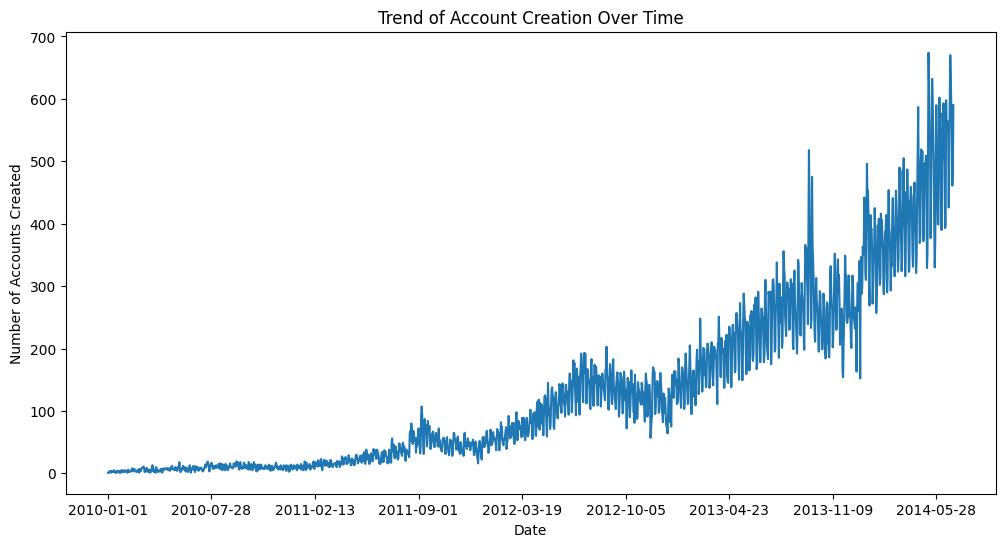

In [ ]:
plt.figure(figsize=(12, 6))
df_temp_1['date_account_created'].value_counts().sort_index().plot()
plt.title('Trend of Account Creation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')

In [ ]:
df_temp_1['isbook'] = ~df_temp_1['date_first_booking'].isna()

<ipython-input-8-44420754b698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1['isbook'] = ~df_temp_1['date_first_booking'].isna()


In [ ]:
df_temp_1

,date_account_created,date_first_booking,timestamp_first_active_new,isbook
0,2010-06-28,NaN,2009-03-19,False
1,2011-05-25,NaN,2009-05-23,False
2,2010-09-28,2010-08-02,2009-06-09,True
3,2011-12-05,2012-09-08,2009-10-31,True
4,2010-09-14,2010-02-18,2009-12-08,True
...,...,...,...,...
213446,2014-06-30,NaN,2014-06-30,False
213447,2014-06-30,NaN,2014-06-30,False
213448,2014-06-30,NaN,2014-06-30,False
213449,2014-06-30,NaN,2014-06-30,False


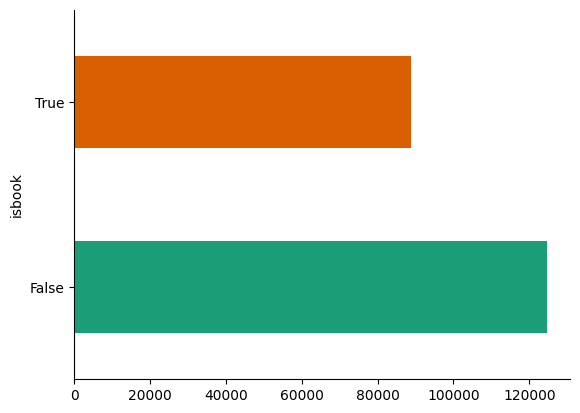

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_temp_1.groupby('isbook').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_temp_booked = df_train[~df_train['date_first_booking'].isna()]
df_temp_nobooked = df_train[df_train['date_first_booking'].isna()]

In [ ]:
df_temp_booked

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


<ipython-input-13-5d2da8b82f91>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_booked, y=y_label, ax=axes[0], palette='Dark2')
<ipython-input-13-5d2da8b82f91>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_nobooked, y=y_label, ax=axes[1], palette='Dark2')


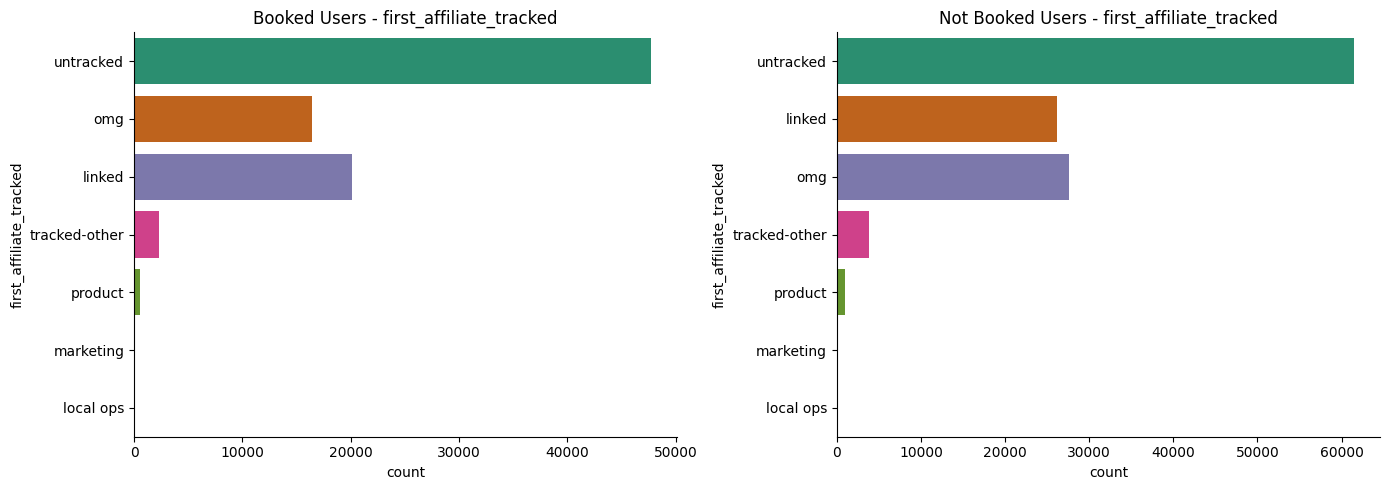

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_label = 'first_affiliate_tracked'

# Set up the matplotlib figure for two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Adjust subplot layout to 1 row and 2 columns

# Plot for 'booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_booked, y=y_label, ax=axes[0], palette='Dark2')
axes[0].set_title('Booked Users - '+y_label)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot for 'not booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_nobooked, y=y_label, ax=axes[1], palette='Dark2')
axes[1].set_title('Not Booked Users - '+y_label)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
df_temp_nobooked

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
13,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [ ]:
df_temp_booked

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


In [ ]:
df_temp_booked_merge = pd.merge(df_temp_booked, df_sessions, left_on='id', right_on='user_id', how='inner', suffixes=('_left', '_right'))
df_temp_nobooked_merge = pd.merge(df_temp_nobooked, df_sessions, left_on='id', right_on='user_id', how='inner', suffixes=('_left', '_right'))

In [ ]:
df_temp_booked_merge['secs_elapsed_new'] = df_temp_booked_merge['secs_elapsed']//1000
df_temp_nobooked_merge['secs_elapsed_new'] = df_temp_nobooked_merge['secs_elapsed']//1000

In [ ]:
df_temp_booked_merge['secs_elapsed_new'].min()

0.0

<ipython-input-24-29953792e733>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_booked_merge, y=y_label, ax=axes[0], palette='Dark2')
<ipython-input-24-29953792e733>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_nobooked_merge, y=y_label, ax=axes[1], palette='Dark2')


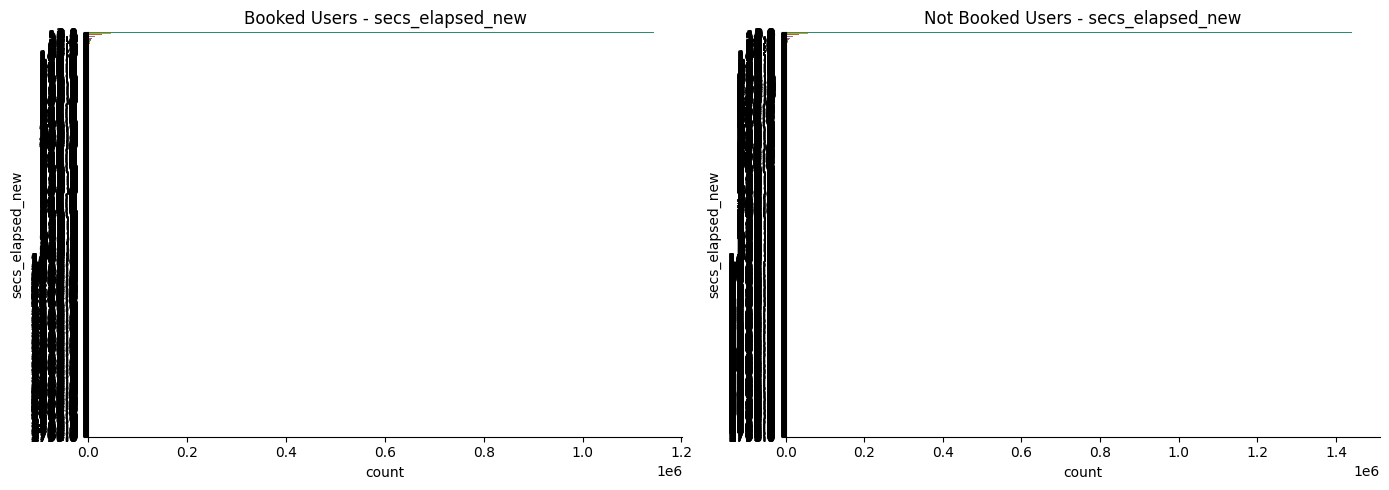

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_label = 'secs_elapsed_new'

# Set up the matplotlib figure for two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Adjust subplot layout to 1 row and 2 columns

# Plot for 'booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_booked_merge, y=y_label, ax=axes[0], palette='Dark2')
axes[0].set_title('Booked Users - '+y_label)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot for 'not booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_nobooked_merge, y=y_label, ax=axes[1], palette='Dark2')
axes[1].set_title('Not Booked Users - '+y_label)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


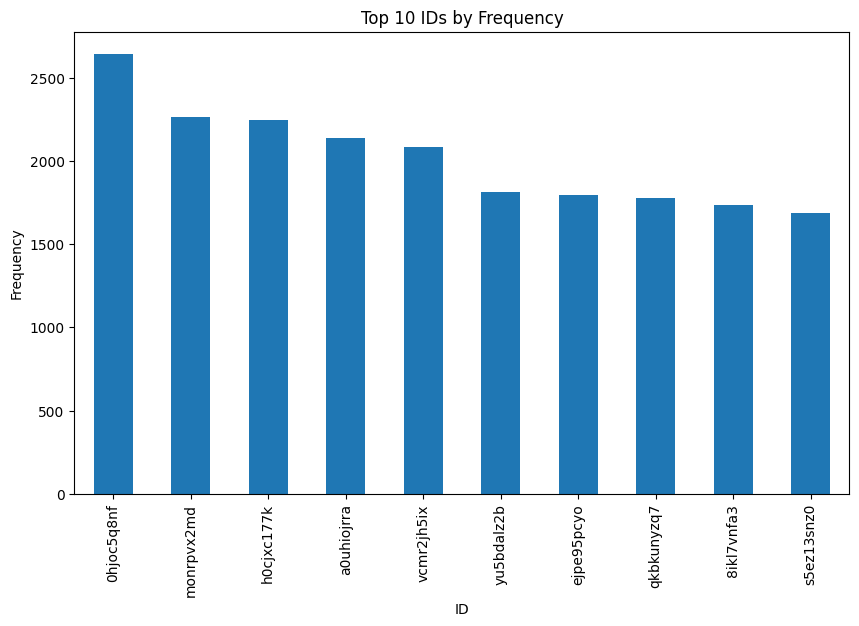

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# 'id'로 groupby 실행 후 각 id별 횟수 계산
id_counts = df_temp_booked_merge.groupby('id').size()

# 횟수가 많은 순으로 정렬하고 상위 10개 선택
top_10_ids = id_counts.sort_values(ascending=False).head(10)

# 그래프로 표시
plt.figure(figsize=(10, 6))
top_10_ids.plot(kind='bar')
plt.title('Top 10 IDs by Frequency')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()

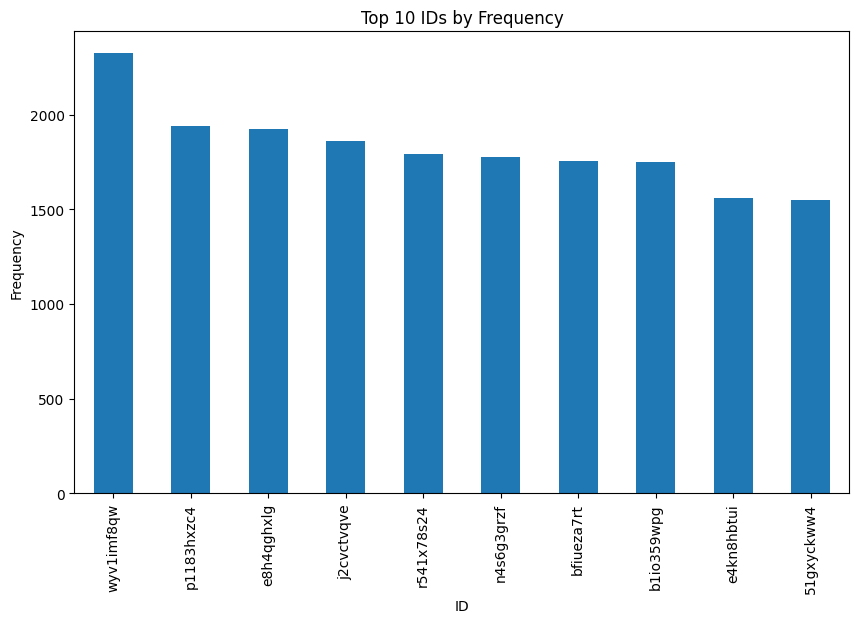

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# 'id'로 groupby 실행 후 각 id별 횟수 계산
id_counts = df_temp_nobooked_merge.groupby('id').size()

# 횟수가 많은 순으로 정렬하고 상위 10개 선택
top_10_ids = id_counts.sort_values(ascending=False).head(10)

# 그래프로 표시
plt.figure(figsize=(10, 6))
top_10_ids.plot(kind='bar')
plt.title('Top 10 IDs by Frequency')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# df_merge = pd.merge(df1, df2, on='key', how='left', suffixes=('_left', '_right'))

# 데이터 분석 1

In [ ]:
# df_train['date_first_booking_month'] = df_train['date_first_booking'].str[5:7]
df_booked = df_train[~df_train['date_first_booking'].isna()]
df_booked['date_first_booking_month'] = df_booked['date_first_booking'].str[5:7].astype(int)
df_nobooked = df_train[df_train['date_first_booking'].isna()]
df_booked['date_account_created_year'] = df_booked['date_account_created'].str[0:4].astype(int)
df_booked['date_account_created_month'] = df_booked['date_account_created'].str[5:7].astype(int)

<ipython-input-16-a0b260a99fc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['date_first_booking_month'] = df_booked['date_first_booking'].str[5:7].astype(int)


In [ ]:
df_booked.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_booking_month
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,8
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,9
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1


In [ ]:
df_booked[['date_first_booking_month']]

,date_first_booking_month
2,8
3,9
4,2
5,1
6,1
...,...
213415,6
213439,3
213441,8
213443,7


In [ ]:
df_booked['date_account_created_year'] = df_booked['date_account_created'].str[0:4].astype(int)
df_booked['date_account_created_month'] = df_booked['date_account_created'].str[5:7].astype(int)

<ipython-input-17-f798c608440b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['date_account_created_year'] = df_booked['date_account_created'].str[0:4].astype(int)
<ipython-input-17-f798c608440b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['date_account_created_month'] = df_booked['date_account_created'].str[5:7].astype(int)


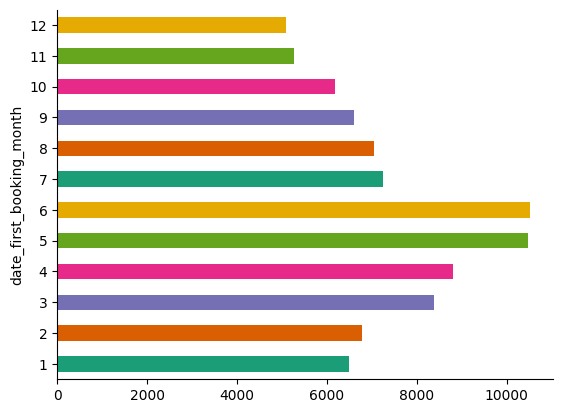

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_booked.groupby('date_first_booking_month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 두 날짜의 차이 계산 (일 단위)
df_booked['days_between_first_booking&account_created'] = (pd.to_datetime(df_booked['date_first_booking']) - pd.to_datetime(df_booked['date_account_created'])).dt.days

<ipython-input-18-cd1addcaa1f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['days_between_first_booking&account_created'] = (pd.to_datetime(df_booked['date_first_booking']) - pd.to_datetime(df_booked['date_account_created'])).dt.days


<ipython-input-10-9439c11ff418>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&account_created'], bins=bins, labels=labels, right=False)


<Figure size 2000x600 with 0 Axes>

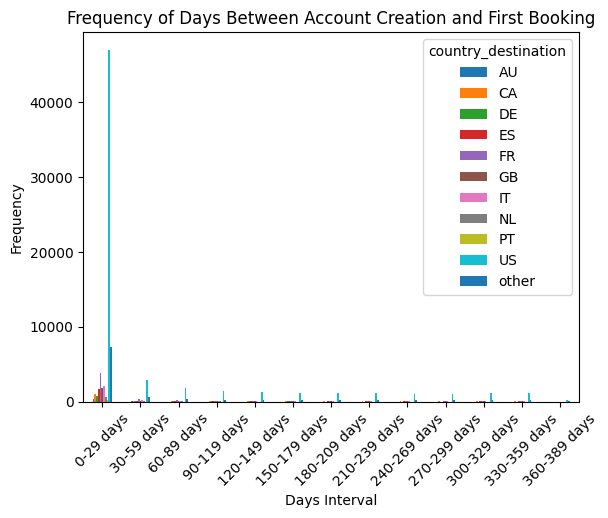

In [ ]:
# 30일 단위로 빈도 계산
bins = range(0, df_booked['days_between_first_booking&account_created'].max() + 30, 30)  # 30일 간격으로 구간 설정
labels = [f'{i}-{i + 29} days' for i in bins[:-1]]
df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&account_created'], bins=bins, labels=labels, right=False)

# 그룹별 빈도 계산
# grouped_data = df_booked['days_group'].value_counts().sort_index()
grouped_data = df_booked.groupby(['days_group', 'country_destination']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(20, 6))
grouped_data.plot(kind='bar')
plt.title('Frequency of Days Between Account Creation and First Booking')
plt.xlabel('Days Interval')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-cdf02cc63e41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&account_created'], bins=bins, labels=labels, right=False)


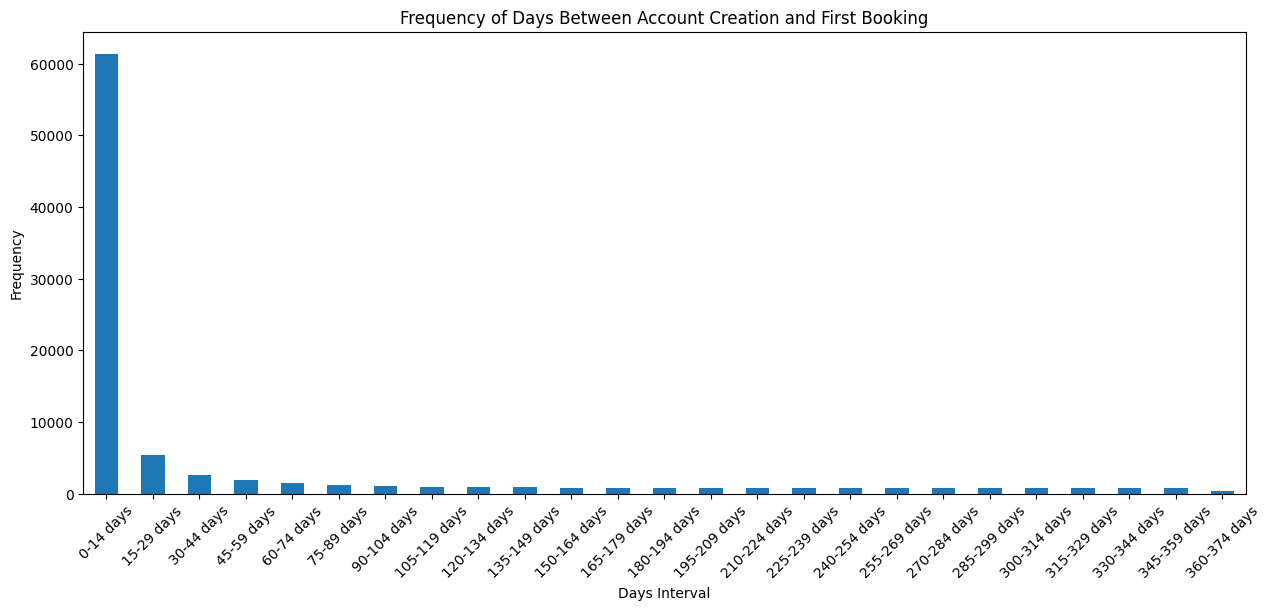

In [ ]:
# 30일 단위로 빈도 계산
bins = range(0, df_booked['days_between_first_booking&account_created'].max() + 15, 15)  # 15일 간격으로 구간 설정
labels = [f'{i}-{i + 14} days' for i in bins[:-1]]
df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&account_created'], bins=bins, labels=labels, right=False)

# 그룹별 빈도 계산
grouped_data = df_booked['days_group'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(15, 6))
grouped_data.plot(kind='bar')
plt.title('Frequency of Days Between Account Creation and First Booking')
plt.xlabel('Days Interval')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-10b746be5e82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&account_created'], bins=bins, labels=labels, right=False)


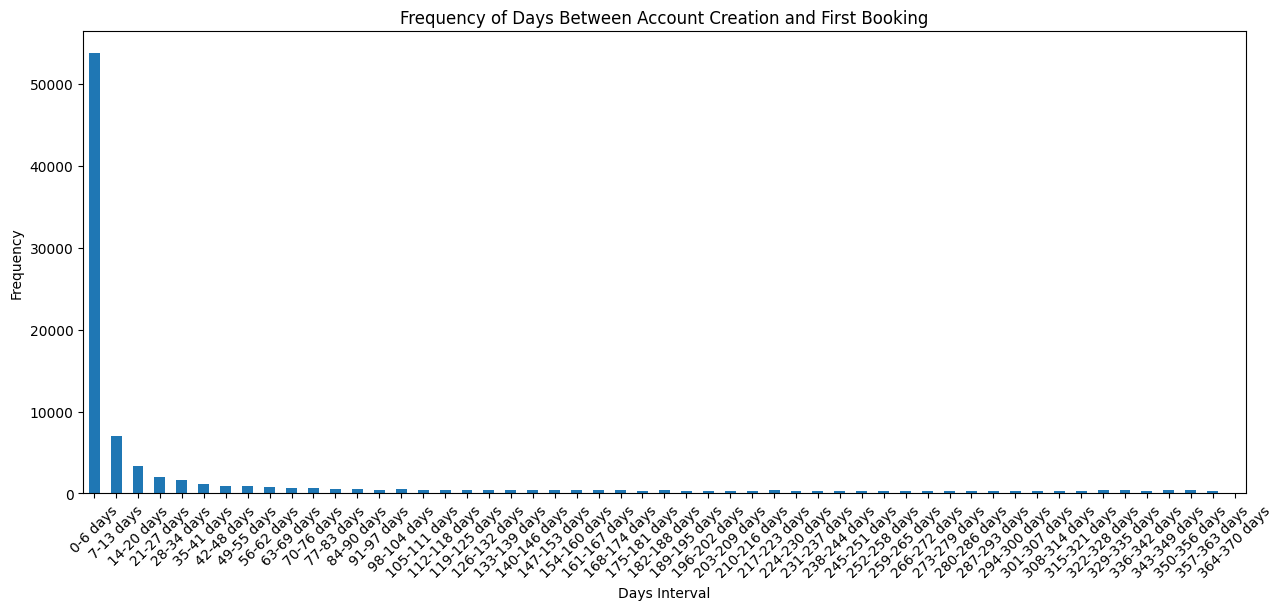

In [ ]:
# 30일 단위로 빈도 계산
bins = range(0, df_booked['days_between_first_booking&account_created'].max() + 7, 7)  # 15일 간격으로 구간 설정
labels = [f'{i}-{i + 6} days' for i in bins[:-1]]
df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&account_created'], bins=bins, labels=labels, right=False)

# 그룹별 빈도 계산
grouped_data = df_booked['days_group'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(15, 6))
grouped_data.plot(kind='bar')
plt.title('Frequency of Days Between Account Creation and First Booking')
plt.xlabel('Days Interval')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_booked['timestamp_first_active'] = df_booked['timestamp_first_active'].astype(str).str[0:4]+'-'+df_booked['timestamp_first_active'].astype(str).str[4:6]+'-'+df_booked['timestamp_first_active'].astype(str).str[6:8]
df_booked['days_between_first_booking&active'] = (pd.to_datetime(df_booked['date_first_booking']) - pd.to_datetime(df_booked['date_account_created'])).dt.days

<ipython-input-29-2183ac3c3022>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['timestamp_first_active'] = df_booked['timestamp_first_active'].astype(str).str[0:4]+'-'+df_booked['timestamp_first_active'].astype(str).str[4:6]+'-'+df_booked['timestamp_first_active'].astype(str).str[6:8]
<ipython-input-29-2183ac3c3022>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['days_between_first_booking&active'] = (pd.to_datetime(df_booked['date_first_booking']) - pd.to_datetime(df_booked['date_ac

In [ ]:
df_booked.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,date_first_booking_month,date_account_created_year,date_account_created_month,days_between_first_booking&account_created,days_between_first_active&booking,days_between_first_booking&active
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,8,2010,9,-57,-14880,-57
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Web,Mac Desktop,Firefox,other,9,2011,12,278,-15313,278
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,US,2,2010,9,-208,-14866,-208
5,osr2jwljor,2010-01-01,2010-01-01,2010-01-02,-unknown-,NaN,basic,0,en,other,...,Web,Mac Desktop,Chrome,US,1,2010,1,1,-14610,1
6,lsw9q7uk0j,2010-01-02,2010-01-02,2010-01-05,FEMALE,46.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,1,2010,1,3,-14611,3


In [ ]:
df_booked['days_between_first_booking&active'].min()

-349

<ipython-input-34-43f47a7a1581>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&active'], bins=bins, labels=labels, right=False)


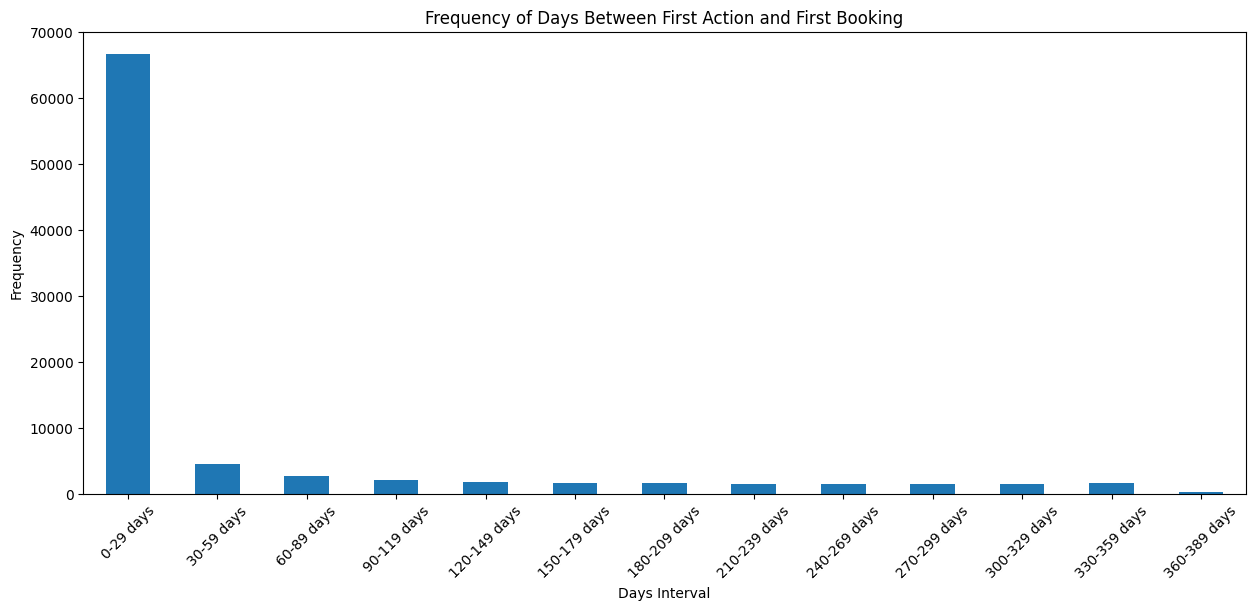

In [ ]:
# 30일 단위로 빈도 계산
bins = range(0, df_booked['days_between_first_booking&active'].max() + 30, 30)  # 15일 간격으로 구간 설정
labels = [f'{i}-{i + 29} days' for i in bins[:-1]]
df_booked['days_group'] = pd.cut(df_booked['days_between_first_booking&active'], bins=bins, labels=labels, right=False)

# 그룹별 빈도 계산
grouped_data = df_booked['days_group'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(15, 6))
grouped_data.plot(kind='bar')
plt.title('Frequency of Days Between First Action and First Booking')
plt.xlabel('Days Interval')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_nobooked.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
13,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF


In [ ]:
df_nobooked['timestamp_first_active'] = df_nobooked['timestamp_first_active'].astype(str).str[0:4]+'-'+df_nobooked['timestamp_first_active'].astype(str).str[4:6]+'-'+df_nobooked['timestamp_first_active'].astype(str).str[6:8]
df_nobooked.head(5)

<ipython-input-19-8785bec36f67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nobooked['timestamp_first_active'] = df_nobooked['timestamp_first_active'].astype(str).str[0:4]+'-'+df_nobooked['timestamp_first_active'].astype(str).str[4:6]+'-'+df_nobooked['timestamp_first_active'].astype(str).str[6:8]


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
11,om1ss59ys8,2010-01-05,2010-01-05,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
13,dy3rgx56cu,2010-01-05,2010-01-05,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF
14,ju3h98ch3w,2010-01-07,2010-01-07,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF


In [ ]:
df_nobooked['days_between_first_active&booking'] = (pd.to_datetime(df_nobooked['timestamp_first_active']) - pd.to_datetime(df_nobooked['date_account_created'])).dt.days

<ipython-input-21-de93483d821e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nobooked['days_between_first_active&booking'] = (pd.to_datetime(df_nobooked['timestamp_first_active']) - pd.to_datetime(df_nobooked['date_account_created'])).dt.days


In [ ]:
df_nobooked

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,days_between_first_active&booking
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,-466
1,820tgsjxq7,2011-05-25,2009-05-23,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,-732
11,om1ss59ys8,2010-01-05,2010-01-05,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF,0
13,dy3rgx56cu,2010-01-05,2010-01-05,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF,0
14,ju3h98ch3w,2010-01-07,2010-01-07,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,0
213447,mhewnxesx9,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,0
213448,6o3arsjbb4,2014-06-30,2014-06-30,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,0
213449,jh95kwisub,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,0


In [ ]:
df_nobooked[df_nobooked['days_between_first_active&booking']==0]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,days_between_first_active&booking
11,om1ss59ys8,2010-01-05,2010-01-05,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF,0
13,dy3rgx56cu,2010-01-05,2010-01-05,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF,0
14,ju3h98ch3w,2010-01-07,2010-01-07,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF,0
16,2dwbwkx056,2010-01-07,2010-01-07,NaN,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF,0
18,cxlg85pg1r,2010-01-08,2010-01-08,NaN,-unknown-,NaN,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-,NDF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,0
213447,mhewnxesx9,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,0
213448,6o3arsjbb4,2014-06-30,2014-06-30,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,0
213449,jh95kwisub,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,0


# 데이터 분석 2

In [ ]:
df_merge = pd.merge(df_train, df_sessions, left_on='id', right_on='user_id', how='inner', suffixes=('_left', '_right'))
df_merge['is_booked'] = df_merge['date_first_booking'].notna()

df_merge_booked = df_merge[df_merge['is_booked']]
df_merge_nobooked = df_merge[~df_merge['is_booked']]

In [ ]:
df_merge.groupby('id').size()

id
00023iyk9l     40
001wyh0pz8     90
0028jgx1x1     31
002qnbzfs5    789
0035hobuyj    489
             ... 
zzx5wp3lqu     52
zzy7t0y9cm      8
zzysuoqg6x      3
zzywmcn0jv     51
zzzlylp57e     74
Length: 73815, dtype: int64

In [ ]:
df_merge_booked.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed,is_booked
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Windows Desktop,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,True
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Windows Desktop,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,True
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Windows Desktop,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,True
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Windows Desktop,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,True
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Windows Desktop,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,True


In [ ]:
df_merge_nobooked.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed,is_booked
127,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,...,Mac Desktop,Firefox,NDF,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0,False
128,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,...,Mac Desktop,Firefox,NDF,yo8nz8bqcq,create,submit,create_user,Mac Desktop,NaN,False
129,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,...,Mac Desktop,Firefox,NDF,yo8nz8bqcq,confirm_email,click,confirm_email_link,Mac Desktop,115983.0,False
130,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,...,Mac Desktop,Firefox,NDF,yo8nz8bqcq,show,view,p3,Mac Desktop,20285.0,False
131,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,...,Mac Desktop,Firefox,NDF,yo8nz8bqcq,show_personalize,data,user_profile_content_update,Mac Desktop,3255.0,False


In [ ]:
df_merge_booked[df_merge_booked['action_type']=='submit']['action_detail'].unique()

array(['contact_host', 'login', 'create_user', 'create_phone_numbers',
       'oauth_login', 'post_checkout_action', 'update_user_profile',
       'send_message', 'delete_phone_numbers', 'apply_coupon',
       'create_listing', 'set_password', 'guest_cancellation',
       'email_wishlist', 'update_listing', 'update_listing_description',
       'update_user', 'notifications', 'signup', 'calculate_worth',
       'wishlist_note', 'respond_to_alteration_request',
       'create_alteration_request', 'delete_listing', 'change_password',
       'forgot_password', 'change_availability', 'host_respond'],
      dtype=object)

In [ ]:
df_merge_booked['action_detail'].unique()

array([nan, 'view_search_results', 'wishlist_content_update',
       'similar_listings', 'change_trip_characteristics', 'p3',
       'header_userpic', 'contact_host', 'message_post', '-unknown-',
       'dashboard', 'confirm_email_link', 'change_contact_host_dates',
       'login_page', 'login', 'user_wishlists', 'create_user',
       'user_profile_content_update', 'user_profile', 'your_trips',
       'create_phone_numbers', 'login_modal', 'message_thread',
       'toggle_archived_thread', 'p1', 'p5', 'pending',
       'profile_verifications', 'edit_profile', 'oauth_login',
       'post_checkout_action', 'account_notification_settings',
       'update_user_profile', 'oauth_response', 'cancellation_policies',
       'at_checkpoint', 'your_listings', 'send_message', 'signup_modal',
       'list_your_space', 'listing_reviews_page', 'wishlist',
       'guest_itinerary', 'guest_receipt', 'account_privacy_settings',
       'profile_references', 'request_new_confirm_email',
       'lookup_mes

In [ ]:
df_merge_booked[df_merge_booked['action_detail']=='complete_booking']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed,is_booked
1326634,7vxv10hv5z,2014-03-01,20140301172915,2014-03-01,-unknown-,NaN,basic,25,en,direct,...,Mac Desktop,Safari,IT,7vxv10hv5z,click,click,complete_booking,iPhone,97459.0,True
1543274,j6fw0jxg47,2014-03-12,20140312010923,2014-03-12,MALE,26.0,basic,24,en,direct,...,iPhone,Mobile Safari,US,j6fw0jxg47,click,click,complete_booking,iPhone,627249.0,True
1582418,99jtu8071w,2014-03-13,20140313171355,2014-03-13,FEMALE,22.0,facebook,12,en,api,...,iPhone,-unknown-,US,99jtu8071w,click,click,complete_booking,iPhone,57144.0,True
1582440,99jtu8071w,2014-03-13,20140313171355,2014-03-13,FEMALE,22.0,facebook,12,en,api,...,iPhone,-unknown-,US,99jtu8071w,click,click,complete_booking,iPhone,7133.0,True
1764689,6kyxp4jx74,2014-03-21,20140321195404,2014-03-21,MALE,36.0,facebook,12,en,api,...,iPhone,Mobile Safari,US,6kyxp4jx74,click,click,complete_booking,iPhone,0.0,True
1764862,6kyxp4jx74,2014-03-21,20140321195404,2014-03-21,MALE,36.0,facebook,12,en,api,...,iPhone,Mobile Safari,US,6kyxp4jx74,click,click,complete_booking,iPhone,3630.0,True
1764871,6kyxp4jx74,2014-03-21,20140321195404,2014-03-21,MALE,36.0,facebook,12,en,api,...,iPhone,Mobile Safari,US,6kyxp4jx74,click,click,complete_booking,iPhone,32163.0,True
1765164,6kyxp4jx74,2014-03-21,20140321195404,2014-03-21,MALE,36.0,facebook,12,en,api,...,iPhone,Mobile Safari,US,6kyxp4jx74,click,click,complete_booking,iPhone,28247.0,True
1765614,6kyxp4jx74,2014-03-21,20140321195404,2014-03-21,MALE,36.0,facebook,12,en,api,...,iPhone,Mobile Safari,US,6kyxp4jx74,click,click,complete_booking,iPhone,12154.0,True
1765626,6kyxp4jx74,2014-03-21,20140321195404,2014-03-21,MALE,36.0,facebook,12,en,api,...,iPhone,Mobile Safari,US,6kyxp4jx74,click,click,complete_booking,iPhone,26210.0,True


In [ ]:
df_merge_nobooked['action_detail'].unique()

array(['dashboard', 'create_user', 'confirm_email_link', 'p3',
       'user_profile_content_update', 'user_profile', 'header_userpic',
       'wishlist_content_update', nan, '-unknown-', 'message_post',
       'pending', 'p5', 'create_phone_numbers', 'view_search_results',
       'similar_listings', 'change_trip_characteristics',
       'cancellation_policies', 'user_wishlists', 'wishlist',
       'message_thread', 'request_new_confirm_email', 'contact_host',
       'change_contact_host_dates', 'send_message', 'your_trips',
       'signup_modal', 'login_page', 'login_modal', 'p1', 'login',
       'signup_login_page', 'account_notification_settings',
       'at_checkpoint', 'manage_listing', 'create_listing',
       'profile_references', 'profile_verifications',
       'update_user_profile', 'edit_profile', 'list_your_space',
       'your_listings', 'popular_wishlists', 'listing_reviews_page',
       'apply_coupon', 'user_tax_forms', 'account_payout_preferences',
       'oauth_response'

# sessions의 각 행을 예약 단계 컬럼 추가하여 통계 확인

In [ ]:
# Function to categorize actions based on the provided stages
def categorize_action(action):
    if action in ['index', 'header_userpic', 'login', 'authenticate', 'confirm_email', 'verify', 'track_page_view',
                  'signup_modal', 'push_notification_callback', 'localization_settings', 'update_notifications',
                  'set_user', 'new_session', 'detect_fb_session']:
        return 'Site Visit'
    elif action in ['search', 'search_results', 'ajax_check_dates', 'ajax_refresh_subtotal', 'similar_listings',
                    'ajax_google_translate', 'ajax_google_translate_reviews', 'qt2']:
        return 'Search'
    elif action in ['show', 'show_personalize', 'lookup', 'personalize', 'view_reservation', 'ask_question',
                    'decision_tree', 'recent_reservations', 'other_hosting_reviews', 'other_hosting_reviews_first',
                    'hosting_social_proof', 'faq', 'listing', 'available', 'widget', 'overview', 'image_order',
                    'review_page']:
        return 'Listing View'
    elif action in ['initiate_booking', 'apply_reservation', 'confirm_email', 'request_photography', 'apply',
                    'preapproval', 'request_new_confirm_email', 'ajax_photo_widget_form_iframe', 'booking']:
        return 'Initiate Booking'
    else:
        return 'Unknown'

# Apply the function to the dataframe
df_sessions['booking_stage'] = df_sessions['action'].apply(categorize_action)

In [ ]:
df_sessions.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,booking_stage
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,Listing View
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,Search
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,Listing View
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,Search
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,Listing View


In [ ]:
df_sessions_agg = df_sessions.groupby('booking_stage').agg(
    average_time=('secs_elapsed', 'mean'),
    count=('secs_elapsed', 'count'),
    max_time=('secs_elapsed', 'max'),
    min_time=('secs_elapsed', 'min'),
    stddev_time=('secs_elapsed', 'std')
)
df_sessions_agg

,average_time,count,max_time,min_time,stddev_time
booking_stage,,,,,
Initiate Booking,10712.012178,43358,1799035.0,0.0,51164.460454
Listing View,11313.433721,3793237,1799328.0,0.0,70337.540703
Search,12186.939772,2232014,1799977.0,0.0,53265.766155
Site Visit,35752.274821,1193724,1799907.0,0.0,134154.543099
Unknown,28137.097443,3169373,1799949.0,0.0,104769.955993


In [ ]:
df_sessions.groupby('booking_stage').agg(average_time=('secs_elapsed', 'mean'), count=('secs_elapsed', 'count'))

,average_time,count
booking_stage,,
Initiate Booking,10712.012178,43358
Listing View,11313.433721,3793237
Search,12186.939772,2232014
Site Visit,35752.274821,1193724
Unknown,28137.097443,3169373


In [ ]:
df_train[df_train['date_first_booking'].notna()]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


# 데이터 분석 3

In [ ]:
df_merge = pd.merge(df_train, df_sessions, left_on='id', right_on='user_id', how='inner', suffixes=('_left', '_right'))
# df_merge = pd.merge(df_train, df_sessions, left_on='id', right_on='user_id', how='right', suffixes=('_left', '_right'))
# df_merge = df_merge[df_merge['id'].notna()]
df_merge['is_booked'] = df_merge['date_first_booking'].notna()

# Function to categorize actions based on the provided stages
def categorize_action(action):
    if action in ['index', 'header_userpic', 'login', 'authenticate', 'confirm_email', 'verify', 'track_page_view',
                  'signup_modal', 'push_notification_callback', 'localization_settings', 'update_notifications',
                  'set_user', 'new_session', 'detect_fb_session']:
        return 'Site Visit'
    elif action in ['search', 'search_results', 'ajax_check_dates', 'ajax_refresh_subtotal', 'similar_listings',
                    'ajax_google_translate', 'ajax_google_translate_reviews', 'qt2']:
        return 'Search'
    elif action in ['show', 'show_personalize', 'lookup', 'personalize', 'view_reservation', 'ask_question',
                    'decision_tree', 'recent_reservations', 'other_hosting_reviews', 'other_hosting_reviews_first',
                    'hosting_social_proof', 'faq', 'listing', 'available', 'widget', 'overview', 'image_order',
                    'review_page']:
        return 'Listing View'
    elif action in ['initiate_booking', 'apply_reservation', 'confirm_email', 'request_photography', 'apply',
                    'preapproval', 'request_new_confirm_email', 'ajax_photo_widget_form_iframe', 'booking']:
        return 'Initiate Booking'
    else:
        return 'Unknown'

# Apply the function to the dataframe
df_merge['booking_stage'] = df_merge['action'].apply(categorize_action)

df_merge_booked = df_merge[df_merge['is_booked']]
df_merge_nobooked = df_merge[~df_merge['is_booked']]

In [ ]:
df_merge

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed,is_booked,booking_stage
0,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,True,Listing View
1,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,True,Search
2,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,True,Listing View
3,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,True,Search
4,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,True,Listing View
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555275,nw9fwlyb5f,2014-06-30,2.014063e+13,NaN,-unknown-,NaN,basic,25.0,en,direct,...,-unknown-,NDF,nw9fwlyb5f,index,data,reservations,iPhone,245.0,False,Site Visit
5555276,nw9fwlyb5f,2014-06-30,2.014063e+13,NaN,-unknown-,NaN,basic,25.0,en,direct,...,-unknown-,NDF,nw9fwlyb5f,unavailabilities,data,unavailable_dates,iPhone,286.0,False,Unknown
5555277,nw9fwlyb5f,2014-06-30,2.014063e+13,NaN,-unknown-,NaN,basic,25.0,en,direct,...,-unknown-,NDF,nw9fwlyb5f,notifications,submit,notifications,iPhone,830.0,False,Unknown
5555278,nw9fwlyb5f,2014-06-30,2.014063e+13,NaN,-unknown-,NaN,basic,25.0,en,direct,...,-unknown-,NDF,nw9fwlyb5f,search,click,view_search_results,iPhone,101961.0,False,Search


In [ ]:
df_merge_booked.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed,is_booked,booking_stage
0,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,True,Listing View
1,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,True,Search
2,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,True,Listing View
3,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,True,Search
4,d1mm9tcy42,2014-01-01,2.014010e+13,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,True,Listing View


In [ ]:
len(df_merge_booked['id'].unique())

28774

In [ ]:
# 각 id별로 'Initiate Booking' 값이 있는지 확인하는 함수 정의
def has_initiate_booking(stages):
    return 'Initiate Booking' in stages.values

# 각 id별로 'Initiate Booking' 값이 있는지 확인
result = df_merge_booked.groupby('id')['booking_stage'].apply(has_initiate_booking).reset_index()

result

,id,booking_stage
0,00023iyk9l,False
1,002qnbzfs5,False
2,0035hobuyj,False
3,006mls2sjw,False
4,006t3vhawl,False
...,...,...
28769,zzq90ckj2z,False
28770,zzv8sgicbk,False
28771,zzvr84im58,False
28772,zzy7t0y9cm,False


In [ ]:
len(df_merge_booked[df_merge_booked['booking_stage'] == 'Initiate Booking']['id'].unique())

3223

In [ ]:
df_merge_nobooked[df_merge_nobooked['booking_stage'] == 'Initiate Booking']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed,is_booked,booking_stage
453,qtw88d9pbl,2014-01-01,2.014010e+13,NaN,MALE,25.0,basic,0.0,en,direct,...,Chrome,NDF,qtw88d9pbl,request_new_confirm_email,click,request_new_confirm_email,Mac Desktop,105.0,False,Initiate Booking
454,qtw88d9pbl,2014-01-01,2.014010e+13,NaN,MALE,25.0,basic,0.0,en,direct,...,Chrome,NDF,qtw88d9pbl,ajax_photo_widget_form_iframe,-unknown-,-unknown-,Mac Desktop,516.0,False,Initiate Booking
682,qtw88d9pbl,2014-01-01,2.014010e+13,NaN,MALE,25.0,basic,0.0,en,direct,...,Chrome,NDF,qtw88d9pbl,ajax_photo_widget_form_iframe,-unknown-,-unknown-,Mac Desktop,5405.0,False,Initiate Booking
683,qtw88d9pbl,2014-01-01,2.014010e+13,NaN,MALE,25.0,basic,0.0,en,direct,...,Chrome,NDF,qtw88d9pbl,ajax_photo_widget_form_iframe,-unknown-,-unknown-,Mac Desktop,1815.0,False,Initiate Booking
6006,gg6b14vkqh,2014-01-01,2.014010e+13,NaN,MALE,25.0,facebook,0.0,en,sem-brand,...,Chrome,NDF,gg6b14vkqh,request_new_confirm_email,click,request_new_confirm_email,Mac Desktop,608.0,False,Initiate Booking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548183,09b9tl1tgp,2014-06-30,2.014063e+13,NaN,MALE,46.0,basic,0.0,en,sem-non-brand,...,Firefox,NDF,09b9tl1tgp,ajax_photo_widget_form_iframe,-unknown-,-unknown-,Windows Desktop,478.0,False,Initiate Booking
5548205,09b9tl1tgp,2014-06-30,2.014063e+13,NaN,MALE,46.0,basic,0.0,en,sem-non-brand,...,Firefox,NDF,09b9tl1tgp,ajax_photo_widget_form_iframe,-unknown-,-unknown-,Windows Desktop,686.0,False,Initiate Booking
5548211,09b9tl1tgp,2014-06-30,2.014063e+13,NaN,MALE,46.0,basic,0.0,en,sem-non-brand,...,Firefox,NDF,09b9tl1tgp,ajax_photo_widget_form_iframe,-unknown-,-unknown-,Windows Desktop,2547.0,False,Initiate Booking
5548213,09b9tl1tgp,2014-06-30,2.014063e+13,NaN,MALE,46.0,basic,0.0,en,sem-non-brand,...,Firefox,NDF,09b9tl1tgp,ajax_photo_widget_form_iframe,-unknown-,-unknown-,Windows Desktop,7114.0,False,Initiate Booking


In [ ]:
stats_1 = df_merge_booked.agg(
    average_time=('secs_elapsed', 'mean'),
    # count=('secs_elapsed', 'count'),
    max_time=('secs_elapsed', 'max'),
    min_time=('secs_elapsed', 'min'),
    stddev_time=('secs_elapsed', 'std')
)

stats_1

,secs_elapsed
average_time,2.201113e+04
max_time,1.799949e+06
min_time,0.000000e+00
stddev_time,9.739539e+04


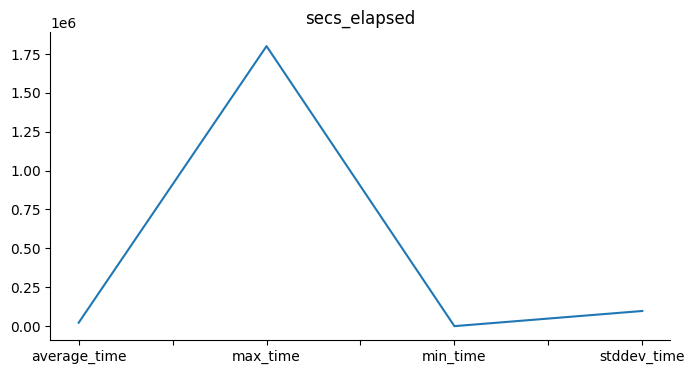

In [ ]:
from matplotlib import pyplot as plt
stats_1['secs_elapsed'].plot(kind='line', figsize=(8, 4), title='secs_elapsed')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
stats_2 = df_merge_nobooked.agg(
    average_time=('secs_elapsed', 'mean'),
    # count=('secs_elapsed', 'count'),
    max_time=('secs_elapsed', 'max'),
    min_time=('secs_elapsed', 'min'),
    stddev_time=('secs_elapsed', 'std')
)

stats_2

,secs_elapsed
average_time,1.919015e+04
max_time,1.799977e+06
min_time,0.000000e+00
stddev_time,8.850461e+04


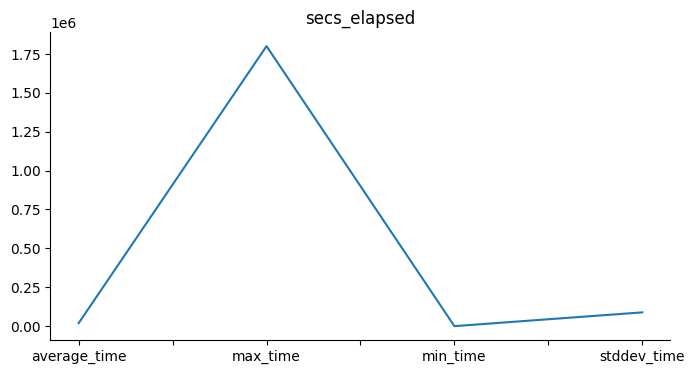

In [ ]:
from matplotlib import pyplot as plt
stats_2['secs_elapsed'].plot(kind='line', figsize=(8, 4), title='secs_elapsed')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
len(df_merge_booked['id'].unique())

28774

# 사용자 행동 시퀀스 분석

In [4]:
keyword_list = [
    'country_options',
    'locale_from_host',
    'southern-europe',
    'life',
    'place_worth',
    'ajax_payout_options_by_country',
    'popular',
    'popular_listing',
    'listings',
    'localization_settings',
    'position',
    'glob',
    'countries',
    'add_guests',
    'localized',
    'city_count',
    'top_destinations',
    'rest-of-world',
]

In [19]:
df_sessions[df_sessions['action'].isin(keyword_list)]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
308,4rvqpxoh3h,listings,-unknown-,-unknown-,iPhone,154.0
831,ucgks2fyez,listings,-unknown-,-unknown-,iPad Tablet,238.0
1161,jrqykh9y8x,listings,-unknown-,-unknown-,Android App Unknown Phone/Tablet,309.0
1162,jrqykh9y8x,listings,-unknown-,-unknown-,Android App Unknown Phone/Tablet,121.0
1167,jrqykh9y8x,listings,-unknown-,-unknown-,Android App Unknown Phone/Tablet,920.0
...,...,...,...,...,...,...
10566914,gpijioh4eh,localization_settings,NaN,NaN,-unknown-,7585.0
10567075,f9a1ncjnrg,listings,view,user_listings,Android Phone,176.0
10567077,f9a1ncjnrg,listings,view,user_listings,Android Phone,45216.0
10567645,fa6260ziny,listings,-unknown-,-unknown-,Windows Desktop,80.0


In [14]:
len(df_train[df_train['id'].isin(df_sessions[df_sessions['action'].isin(keyword_list)]['user_id'].unique())])

11705

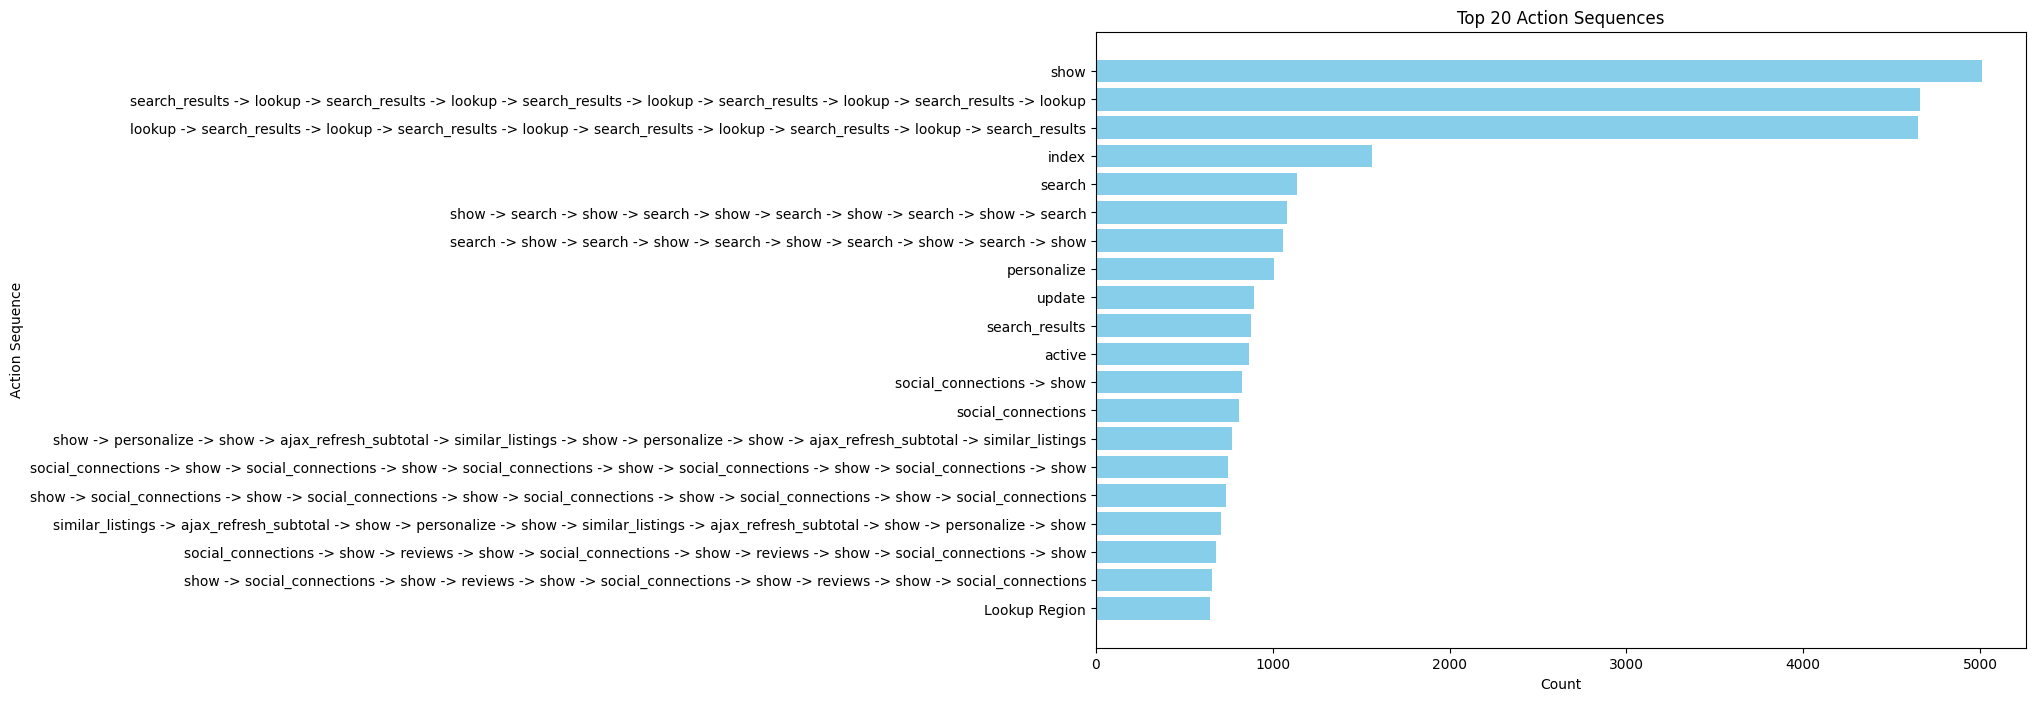

In [17]:
from collections import Counter
from matplotlib import pyplot as plt

# 'create' action이 있는 사용자만 필터링
users_with_create = df_sessions[df_sessions['action'].isin(keyword_list)]['user_id'].unique()
filtered_sessions = df_sessions[df_sessions['user_id'].isin(users_with_create)]

# 데이터 병합 (사용자 ID를 기준으로)
# merged_df = pd.merge(filtered_sessions, df_train, left_on='user_id', right_on='id', how='inner')

# print("Merged Data Sample:")
# print(merged_df.head(), "\n")

# 사용자별 행동 시퀀스 추출
# def compress_sequence(sequence):
#     """연속된 동일한 행동을 하나로 압축"""
#     compressed = []
#     previous_action = None
#     for action in sequence:
#         if action != previous_action:
#             compressed.append(action)
#         previous_action = action
#     return compressed

def compress_sequence(sequence):
    """연속된 동일한 행동을 하나로 압축"""
    compressed = []
    previous_action = None
    for action in sequence:
        action_temp = 'Lookup Region' if action in keyword_list else action
        if action_temp != previous_action:
            compressed.append(action_temp)
        previous_action = action_temp
    return compressed

user_sequences = filtered_sessions.groupby('user_id')['action'].apply(compress_sequence).reset_index()
# print('1 : ',len(user_sequences))

# 'create'가 포함된 시퀀스만 필터링
# def contains_create(sequence):
#     return 'create' in sequence

# user_sequences = user_sequences[user_sequences['action'].apply(contains_create)]
# user_sequences_with_create = user_sequences[user_sequences['action'].apply(contains_create)]
# print('2 : ',len(user_sequences))
# print("Sample User Sequences:")
# print(user_sequences.head(), "\n")

# 전체 행동 시퀀스 분석
pattern_counts = Counter()

# 모든 행동 시퀀스를 분석하여 패턴을 파악
for sequence in user_sequences['action']:
    for i in range(len(sequence)):
        # 시퀀스의 각 행동을 패턴으로 저장
        pattern = tuple(sequence[i:i+10])
        pattern_counts[pattern] += 1

# 가장 빈번한 행동 시퀀스 패턴을 출력
sorted_patterns = sorted(pattern_counts.items(), key=lambda x: x[1], reverse=True)
# print("Top Sequences:")
# for pattern, count in sorted_patterns[:20]:  # 상위 20개의 패턴
#     print(f"Pattern: {pattern}, Count: {count}")

# 행동 시퀀스 패턴 시각화
if sorted_patterns:
    patterns, counts = zip(*sorted_patterns[:20])
    patterns_str = [' -> '.join(pattern) for pattern in patterns]

    plt.figure(figsize=(12, 8))
    plt.barh(patterns_str, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Action Sequence')
    plt.title('Top 20 Action Sequences')
    plt.gca().invert_yaxis()  # 위에서 아래로 가장 빈번한 패턴을 표시
    plt.show()
else:
    print("No sequences found.")


In [ ]:
user_sequences

,user_id,action
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ..."
1,0010k6l0om,"[search_results, show, personalize, show, sear..."
2,001wyh0pz8,"[search, show, social_connections, index, show..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ..."
...,...,...
135478,zzxox7jnrx,"[identity, kba, kba_update, populate_from_face..."
135479,zzy7t0y9cm,"[personalize, header_userpic, create, personal..."
135480,zzysuoqg6x,"[hosting_social_proof, create, header_userpic]"
135481,zzywmcn0jv,"[header_userpic, personalize, ajax_lwlb_contac..."


In [ ]:
len(sorted_patterns)

4752814